# Exploratory Data Analysis (EDA): 

The data is from:

https://simplemaps.com/data/world-cities

We're proud to offer a simple, accurate and up-to-date database of the world's cities and towns. We've built it from the ground up using authoritative sources such as the NGIA, US Geological Survey, US Census Bureau, and NASA.

Our database is:

Up-to-date: It was last refreshed on May 11, 2025.
Comprehensive: Over 4 million unique cities and towns from every country in the world (about 48 thousand in basic database).
Accurate: Cleaned and aggregated from official sources. Includes latitude and longitude coordinates.
Simple: A single CSV file, concise field names, only one entry per city.

Columns: ['city', 'city_ascii', 'lat', 'lng', 'country', 'iso2', 'iso3', 'admin_name', 'capital', 'population', 'id']
47,805 cities across 240 countries

Top 10 cities most similar to 'New York' within United States:
             city        country  population  similarity
33    Los Angeles  United States  11885717.0    0.981987
52        Chicago  United States   8489066.0    0.956910
86          Miami  United States   6113982.0    0.942834
88        Houston  United States   6046392.0    0.940855
94         Dallas  United States   5843632.0    0.935451
102  Philadelphia  United States   5696588.0    0.927401
121       Atlanta  United States   5211164.0    0.926113
123    Washington  United States   5146120.0    0.921123
159        Boston  United States   4355184.0    0.907727
179       Phoenix  United States   4065338.0    0.906462


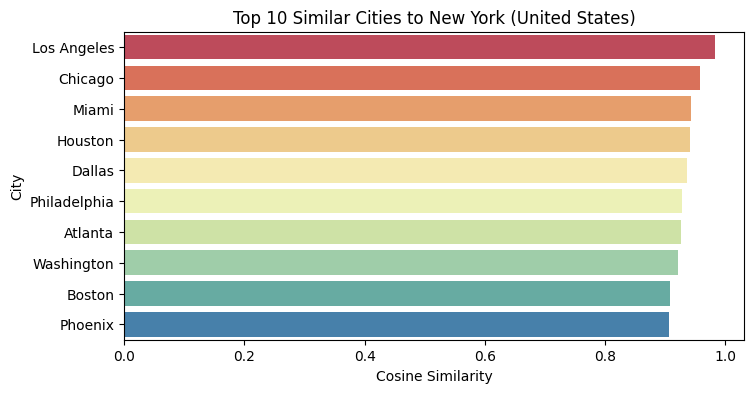


Top 10 cities most similar to 'Paris' within France:
             city country  population  similarity
748      Bordeaux  France    994920.0    0.960880
855     Marseille  France    877215.0    0.959420
1386         Lyon  France    520774.0    0.956643
1409     Toulouse  France    511684.0    0.956628
2115       Nantes  France    325070.0    0.955151
1955         Nice  France    353701.0    0.954801
2345   Strasbourg  France    291709.0    0.954695
2231  Montpellier  France    307101.0    0.954661
2797        Lille  France    238695.0    0.954316
2924       Rennes  France    227830.0    0.954266


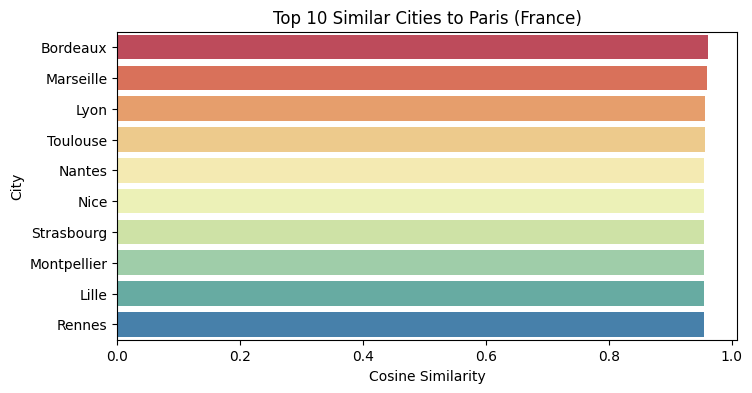


Top 10 cities most similar to 'Tokyo' within Japan:
          city country  population  similarity
23       Ōsaka   Japan  15126000.0    0.927463
45      Nagoya   Japan   9197000.0    0.869838
197   Yokohama   Japan   3757630.0    0.799701
366    Fukuoka   Japan   2286000.0    0.779135
423    Sapporo   Japan   1959313.0    0.771875
504       Kōbe   Japan   1521707.0    0.766944
503   Kawasaki   Japan   1531646.0    0.766806
528      Kyōto   Japan   1463723.0    0.765989
564    Saitama   Japan   1325843.0    0.763622
622  Hiroshima   Japan   1198021.0    0.762029


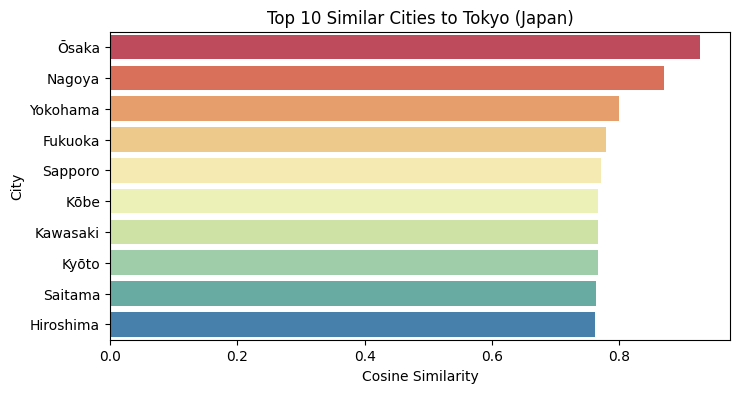


Top 10 cities most similar to 'Mumbai' within India:
          city country  population  similarity
10     Kolkāta   India  21747000.0    0.995991
2        Delhi   India  32226000.0    0.994600
21   Bangalore   India  15386000.0    0.978547
29     Chennai   India  12395000.0    0.959233
39   Hyderābād   India  10494000.0    0.943123
55        Pune   India   8231000.0    0.921332
58   Ahmedabad   India   8009000.0    0.916894
79       Sūrat   India   6538000.0    0.900600
90   Prayagraj   India   5954391.0    0.889894
150     Belāhi   India   4487379.0    0.869805


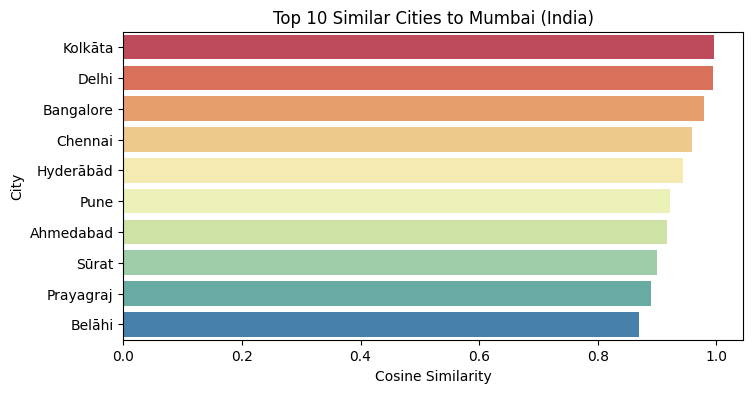


Top 10 cities most similar to 'Sydney' within Australia:
               city    country  population  similarity
127       Melbourne  Australia   5031195.0    0.999577
295        Brisbane  Australia   2706966.0    0.997019
388           Perth  Australia   2141834.0    0.996996
545        Adelaide  Australia   1387290.0    0.995449
1845       Canberra  Australia    381488.0    0.992101
1992  Central Coast  Australia    346596.0    0.992006
1548     Cranbourne  Australia    460491.0    0.991995
1202     Gold Coast  Australia    607665.0    0.991956
2572     Wollongong  Australia    261896.0    0.991704
4145      Newcastle  Australia    152984.0    0.991285


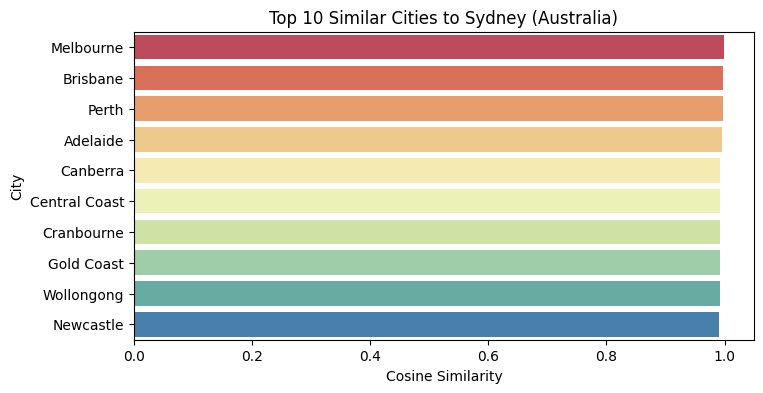

In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv("worldcities.csv")


print("Columns:", list(df.columns))

# getting list of columns in the data and labeling the ones we need for project (reduce runtime)

available_cols = df.columns
cols_needed = ["city", "country", "lat", "lng", "population"]
cols = [c for c in cols_needed if c in available_cols]

df = df[cols].dropna(subset=["population", "lat", "lng"]) # drop missing rows for these columns
df = df[df["population"] > 0] # no cities with population of zero

print(f"{len(df):,} cities across {df['country'].nunique()} countries") # unique (no duplicates)

# normalizing numeric data with min/max columns method between 0 and 1

scaler = MinMaxScaler()
df_scaled = df.copy() # keep original the same by using copy
df_scaled[["lat", "lng", "population"]] = scaler.fit_transform(df[["lat", "lng", "population"]]) # applying normalization to columns

# similarity function for top 10 cities in the same country

def similar_cities(query_city, df, df_scaled, top_k=10):

    if query_city not in df["city"].values:
        print(f"City '{query_city}' not found in dataset.") # stop if city is not in data
        return None
    
    # find specific row for given city

    query_row = df[df["city"] == query_city].iloc[0]
    query_value = df_scaled.loc[df["city"] == query_city, ["lat", "lng", "population"]].values # acquire scaled numeric output for similarity measures

    # comparison to cities within the same country (using subset, mapping to scaled version)
    subset = df[df["country"] == query_row["country"]]
    subset_scaled = df_scaled.loc[subset.index] 
    city_country = query_row["country"]

    if len(subset) <= 1: # stop if country only has one city listed
        print(f"Not enough cities in {city_country} for comparison.")
        return None

    # cosine similarity measuring how similar each city is to the query city (0-1)
    cosine_sim = cosine_similarity(query_value, subset_scaled[["lat", "lng", "population"]])[0]

    # add scores/proportions for similarity to dataframe and remove original query city

    subset = subset.copy() # copy to keep original 
    subset["similarity"] = cosine_sim
    subset = subset[subset["city"] != query_city]

    top_cities = subset.sort_values("similarity", ascending=False).head(top_k)

    # output

    print(f"\nTop {top_k} cities most similar to '{query_city}' within {city_country}:")
    print(top_cities[["city", "country", "population", "similarity"]])

    # barplot
    plt.figure(figsize=(8, 4))
    sns.barplot(x=top_cities["similarity"], y=top_cities["city"], palette="Spectral", hue=top_cities["city"])
    plt.title(f"Top {top_k} Similar Cities to {query_city} ({city_country})")
    plt.xlabel("Cosine Similarity")
    plt.ylabel("City")
    plt.show()

    return top_cities


query_cities = ["New York", "Paris", "Tokyo", "Mumbai", "Sydney"]

for city in query_cities:
    similar_cities(city, df, df_scaled, top_k=10)


